In [1]:
# Ml modules 
import sklearn

# common modules imports
import numpy as np
import pandas as pd
# for visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# DATASET PATH
TRAIN_PATH = r'D:\jypyter notebooks\kaggle\Kidney Stone Prediction\train.csv'
TEST_PATH = r'D:\jypyter notebooks\kaggle\Kidney Stone Prediction\test.csv'
SAMPLE_SUB = r'D:\jypyter notebooks\kaggle\Kidney Stone Prediction\sample_submission.csv'

# Loading data

In [2]:
train_df = pd.read_csv(TRAIN_PATH, index_col = ['id'])
test_df = pd.read_csv(TEST_PATH, index_col = ['id'])
sample_sub_df = pd.read_csv(SAMPLE_SUB, index_col = ['id'])

In [3]:
features = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']
target_feature = ['target']

# Exploratory Data Analysis

## About The Data and features

To predict the presence of kidney stones based on urine analysis. the urine specimens, analyzed in an effort to determine if certain physical characteristics of the urine might be related to the formation of calcium oxalate crystals.

-  The `six physical` characteristics/`features` of the urine are:
    
    -  (1) `specific gravity`, the density of the urine relative to water. 
    -  (2) `pH`, the negative logarithm of the hydrogen ion.
    -  (3) `osmolarity (mOsm)`, a unit used in biology and medicine but not in physical chemistry. Osmolarity is  proportional to the concentration of molecules in solution.
    -  (4) `conductivity (mMho milliMho)`, One Mho is one reciprocal Ohm. Conductivity is proportional to the concentration of charged ions in solution.
    -  (5) `urea concentration in millimoles per litre.`
    -  (6) `calcium concentration (CALC) in millimolesllitre.`


# More information about features


- `Specific gravity` is a measure of the density of a substance compared to the density of water. 
In the context of urine and kidney stones, specific gravity is used as a diagnostic tool to evaluate the concentration of solutes in the urine.
When a person has kidney stones, the concentration of solutes in their urine can be high, leading to a higher specific gravity.
A specific gravity value above 1.020 is considered high and may indicate the presence of kidney stones or other urinary tract problems.
- `pH` of urine is a measure of its acidity or alkalinity. In the context of kidney stones, urine pH is an important factor as it can affect the formation of different types of kidney stones.
Most kidney stones are formed from calcium oxalate, which tends to form in acidic urine. Therefore, if the urine pH is too acidic (less than 5.5), it can increase the risk of calcium oxalate stone formation. On the other hand, if the urine pH is too alkaline (greater than 7.2), it can increase the risk of calcium phosphate stone formation.
Urinary tract infections (UTIs) can also affect urine pH. UTIs can increase the pH of urine, making it more alkaline, which can increase the risk of struvite stone formation.Therefore, measuring urine pH can be helpful in determining the type of kidney stone a person is likely to form and can help in devising preventive strategies.
- `Osmolarity` is a measure of the concentration of solutes in a solution. It can provide information about the concentration of solutes that can contribute to stone formation. High osmolarity in urine means that there are higher amounts of solutes, such as calcium, oxalate, and uric acid, which can lead to the formation of kidney stones. In contrast, low osmolarity indicates that the urine is more dilute and contains fewer solutes, which may reduce the risk of stone formation.
- `conductivity` of urine refers to the concentration of dissolved ions in the urine.conductivity can be used as a diagnostic tool to determine the presence of certain types of stones. For example, calcium-based stones tend to be highly conductive, while other types of stones, such as uric acid stones, are less conductive.
- `Urea` is a waste product that is produced by the liver during the breakdown of proteins and is excreted in the urine. measuring the concentration of urea in the urine can provide information about the solute concentration, which can contribute to the formation of kidney stones.High urea concentration in urine can indicate dehydration or a high protein diet, both of which can increase the risk of stone formation. However, low urea concentration may also indicate certain medical conditions, such as liver disease or low protein intake, which can affect the formation of kidney stones.
- `concentration of calcium` in the urine can provide information about the risk of stone formation.Most kidney stones are made up of calcium oxalate, and high levels of calcium in the urine can increase the risk of stone formation. However, low levels of calcium in the urine can also increase the risk of stone formation, as it can lead to an increase in oxalate levels, which can contribute to stone formation.<br>

In [4]:
# Taking a look at data
train_df.head(5)

,gravity,ph,osmo,cond,urea,calc,target
id,,,,,,,
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1


<span style="color:green"> checking for null values</span>

In [5]:
# checking for null values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  414 non-null    float64
 1   ph       414 non-null    float64
 2   osmo     414 non-null    int64  
 3   cond     414 non-null    float64
 4   urea     414 non-null    int64  
 5   calc     414 non-null    float64
 6   target   414 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 25.9 KB


<span style="color:green">The data dosent contain any null value and all features are numeric </span>


<AxesSubplot: >

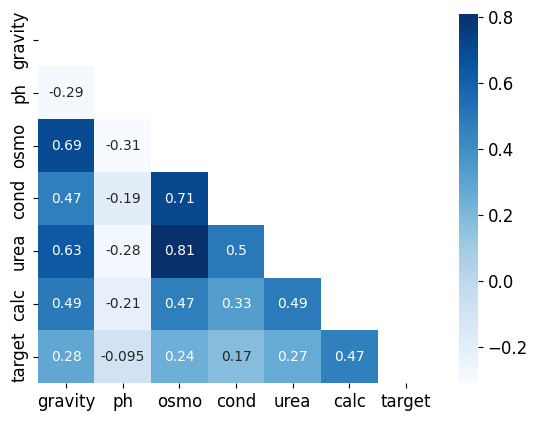

In [6]:
corr = train_df.corr(method='pearson')
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, cmap = 'Blues', mask = matrix)

<span style="color:Blue">osmo and urea shows very strong correlation while other paires like osmo:gravity and osmo:cond shows a pretty decent correlation. Apart from all ph shows a negitive correaltion to target

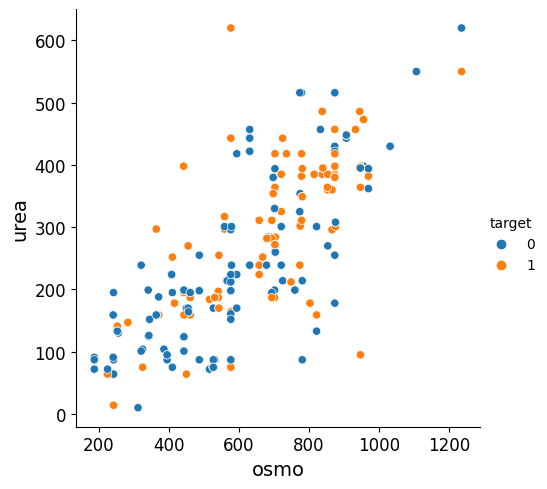

In [7]:
sns.relplot(data= train_df, x ='osmo', y= 'urea', hue= 'target')

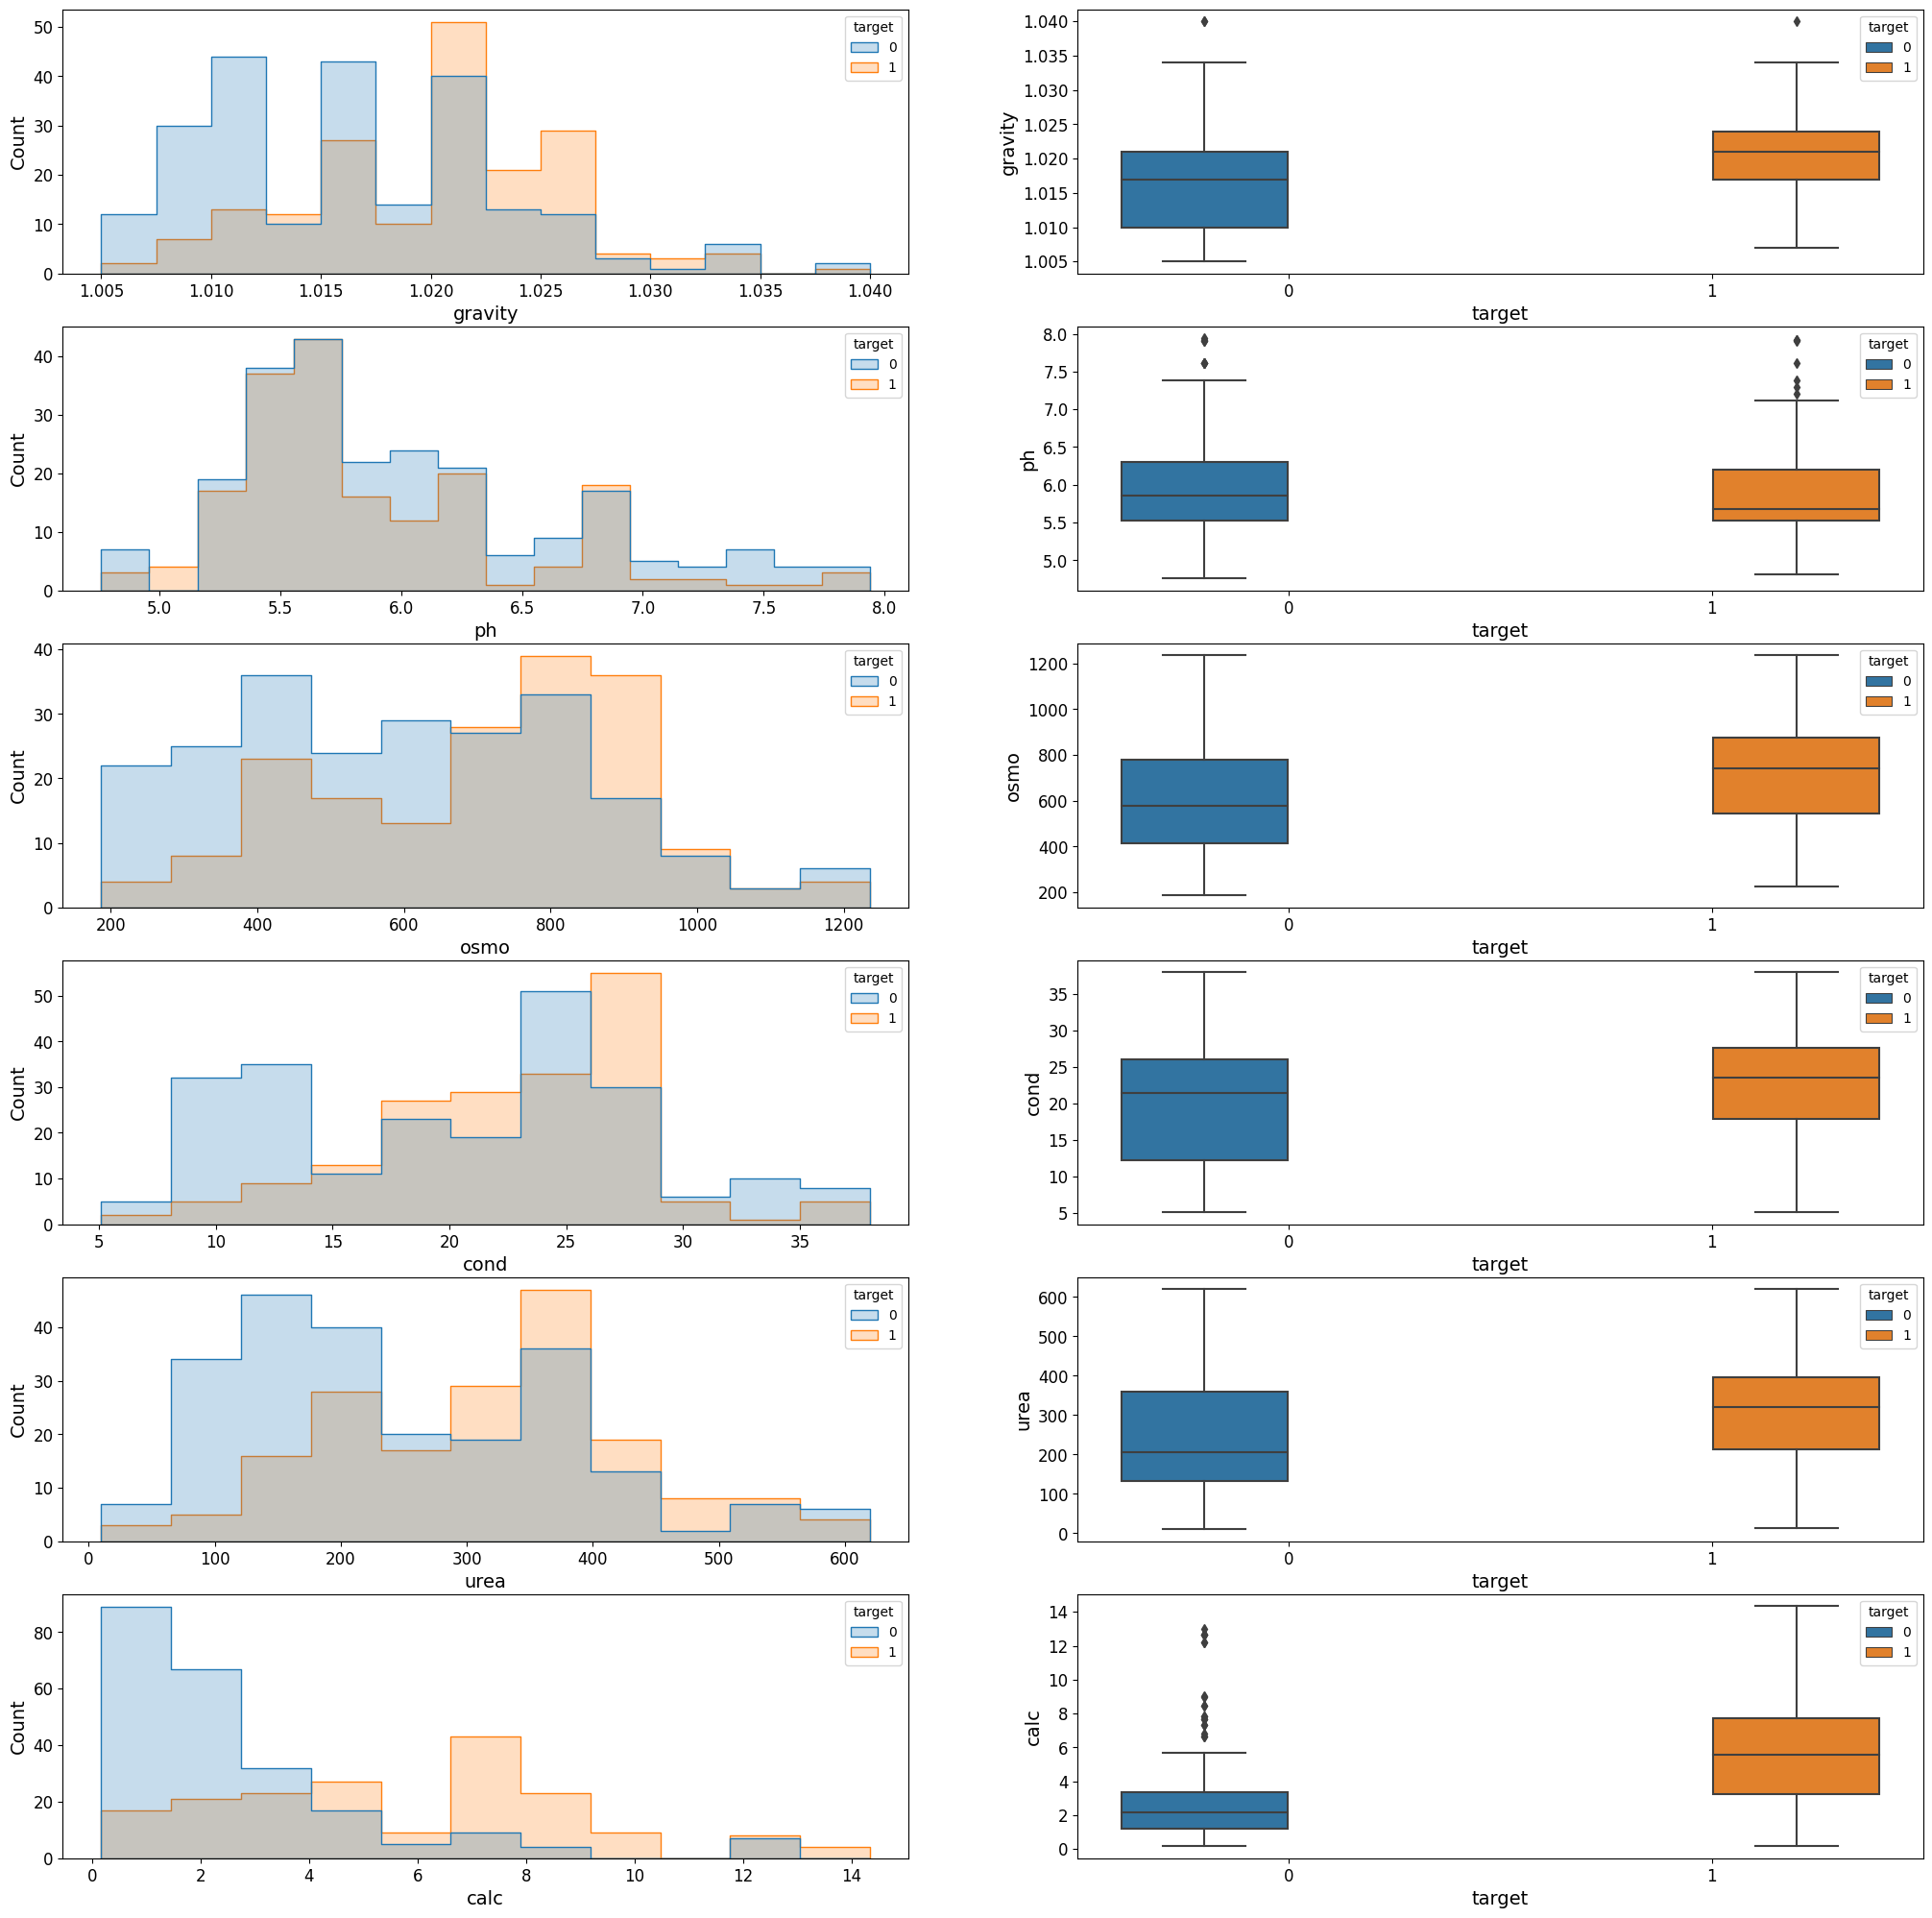

In [8]:
def plot_numerical_data():
    fig,axes =plt.subplots(6,2,figsize = (25,25))
    
    sns.histplot(ax = axes[0,0], x='gravity', hue='target',data=train_df, element="step")
    sns.boxplot(ax = axes[0,1], x='target', y='gravity', hue='target',data=train_df)
    
    sns.histplot(ax = axes[1,0], x='ph', hue='target',data=train_df, element="step")
    sns.boxplot(ax = axes[1,1], x='target', y='ph', hue='target',data=train_df)

    sns.histplot(ax = axes[2,0], x='osmo', hue='target',data=train_df, element="step")
    sns.boxplot(ax = axes[2,1], x='target', y='osmo', hue='target',data=train_df)

    sns.histplot(ax = axes[3,0], x='cond', hue='target',data=train_df, element="step")
    sns.boxplot(ax = axes[3,1], x='target', y='cond', hue='target',data=train_df)
    
    sns.histplot(ax = axes[4,0], x='urea', hue='target',data=train_df, element="step")
    sns.boxplot(ax = axes[4,1], x='target', y='urea', hue='target',data=train_df)
    
    sns.histplot(ax = axes[5,0], x='calc', hue='target',data=train_df, element="step")
    sns.boxplot(ax = axes[5,1], x='target', y='calc', hue='target',data=train_df)

plot_numerical_data()